이미지 분류 딥러닝 모델 

In [24]:
## 패션 MNIST 데이터셋을 활용한 분류 모델 만들기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 데이터셋 가져오기
data = tf.keras.datasets.fashion_mnist

# 머신러닝과 구조와 조금 다르다
(X_train, y_train), (X_test, y_test) = data.load_data()

In [26]:
# 이미지 데이터 총 7만개, width : 28, height : 28, 컬러채널값 없음 = 흑백 이미지
print(X_train.shape, X_test.shape) # (60000, 28, 28) (10000, 28, 28) 
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [27]:
X_train.ndim

3

In [28]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag', 'Ankle boot']

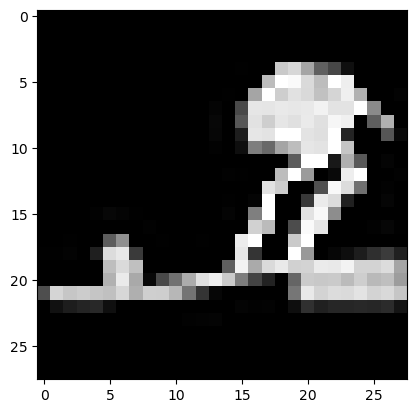

In [30]:
plt.figure()
plt.imshow(X_train[777], cmap="gray") # 0 ~ 59999
plt.grid(False)
plt.show()

In [31]:
label = y_train[777]
print(class_names[label])

Sandal


In [32]:
X_train.max() # 컬러 최댓값 = 흰색 (255)

255

In [33]:
# 데이터 스케일링
# 소수 데이터로 만들어 주기 위해서 MinMax 스케일링을 진행한다.
# 똥멍청이 컴퓨터는 소수 계산이 빠르셔서 스케일링을 해주어야 한다.
X_train = X_train/255
X_test = X_test/255

In [34]:
X_train[0].max()

1.0

In [35]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

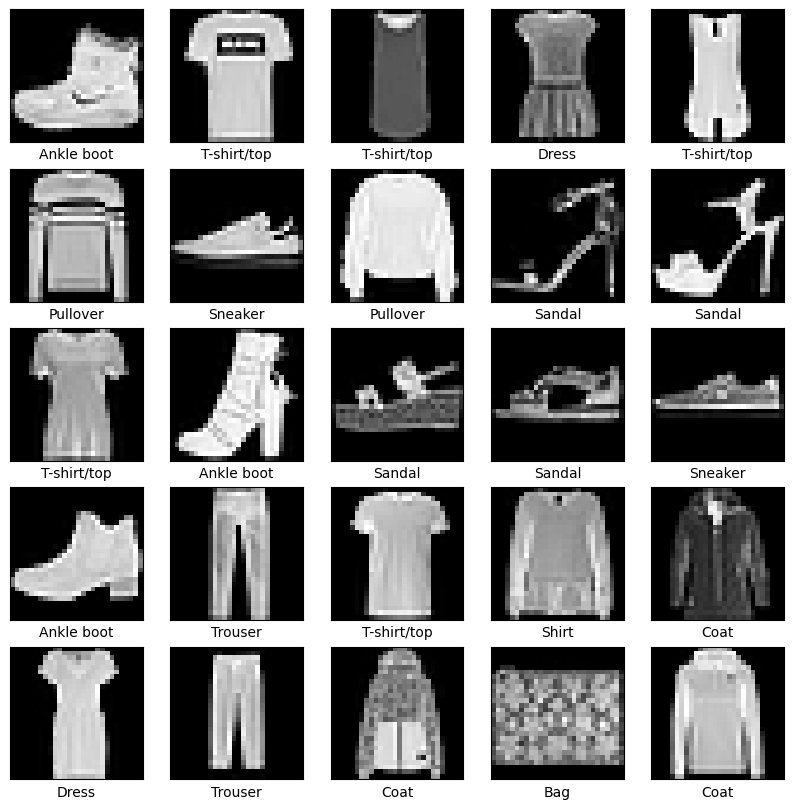

In [36]:
plt.figure(figsize=(10,10))
c = 0
for i in range(0,25):
    c += 1
    plt.subplot(5,5,c)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])

plt.show()

In [37]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
X_train.shape[1:]

(28, 28)

In [39]:
## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [40]:
# 모델 컴파일
# 0인 데이터가 너무 많으면 얘가 잘 못찾으므로 소실함수로 'SparseCategoricalCrossentropy'를 사용
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7451 - loss: 0.7178
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8569 - loss: 0.3883
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8757 - loss: 0.3437
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8820 - loss: 0.3210
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8884 - loss: 0.2989
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8935 - loss: 0.2839
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8990 - loss: 0.2719
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9041 - loss: 0.2545
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9085 - loss: 0.2455
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.2330
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - loss: 0.2284
Epoch 12/30
1875/1875 ━━━━━━━━

In [42]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.4294


[0.4294169843196869, 0.8948000073432922]

테스트 데이터의 성능은 낮은데 트레인 데이터의 성능은 높다?
=> 과적합을 의심해볼만 하다.

In [43]:
# 시각화

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [44]:
pro_model = tf.keras.Sequential([model,
                                 tf.keras.layers.Softmax()])
predictions = pro_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [45]:
def show_img(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], y_test)
    plt.show()

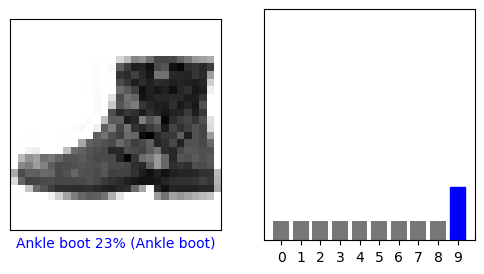

In [46]:
show_img(9995)

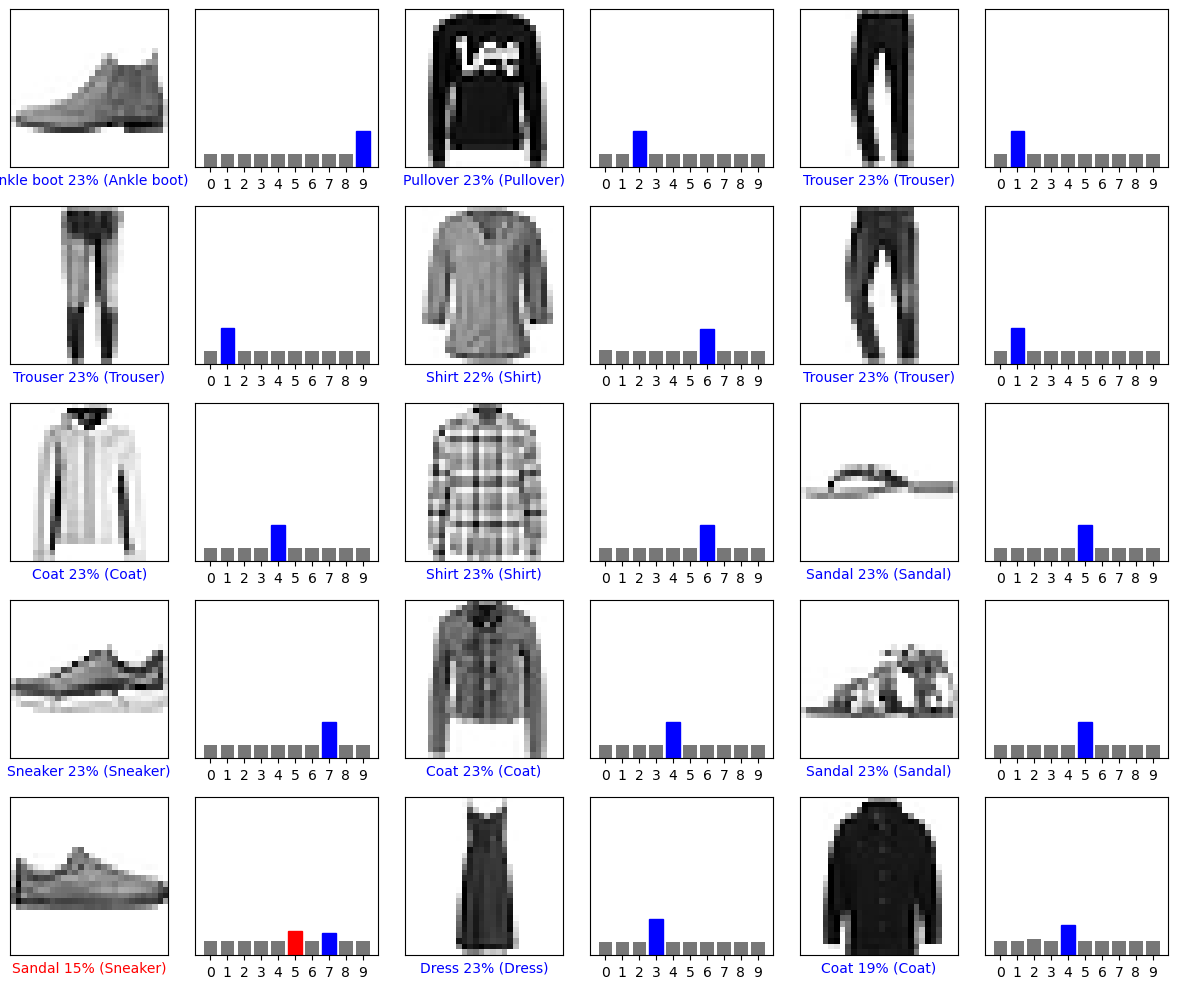

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [138]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,672 (2.80 MB)

 Trainable params: 244,890 (956.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 489,782 (1.87 MB)

모델 새로 만들기

In [157]:
## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(228, activation='relu'))
model.add(tf.keras.layers.Dense(154, activation='relu'))
model.add(tf.keras.layers.Dense(68, activation='relu'))
model.add(tf.keras.layers.Dense(45, activation='relu'))
model.add(tf.keras.layers.Dense(26, activation='relu'))
model.add(tf.keras.layers.Dense(19, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='relu'))

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [158]:
# 모델 컴파일
# 0인 데이터가 너무 많으면 얘가 잘 못찾으므로 소실함수로 'SparseCategoricalCrossentropy'를 사용
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [159]:
# k - 폴드 교차 검증 : validation_data를 사용하는 것
# validation_data는 1번의 epochs를 돌고 테스트해보고를 반복하는 것(머신러닝에서도 사용가능),
history = model.fit(X_train, y_train, epochs=100,
                   validation_data = (X_test, y_test))

Epoch 1/100


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6690 - loss: 0.9111 - val_accuracy: 0.8216 - val_loss: 0.4847
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8521 - loss: 0.4116 - val_accuracy: 0.8483 - val_loss: 0.4581
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.3615 - val_accuracy: 0.8574 - val_loss: 0.3971
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8825 - loss: 0.3299 - val_accuracy: 0.8751 - val_loss: 0.3571
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8868 - loss: 0.3099 - val_accuracy: 0.8753 - val_loss: 0.3519
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8896 - loss: 0.3009 - val_accuracy: 0.8677 - val_loss: 0.3669
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.2893 - val_accuracy: 0.8780 - val_loss: 0.3473
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - loss: 0.2731 - val_

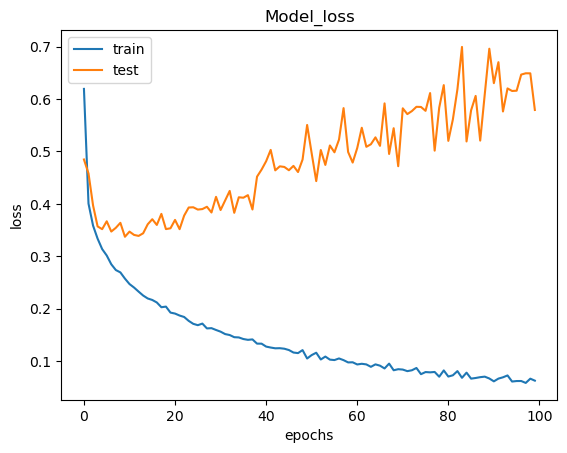

In [160]:
# 과적합 확인 => train과 test의 그래프 간격이 벌어지면 과적합
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

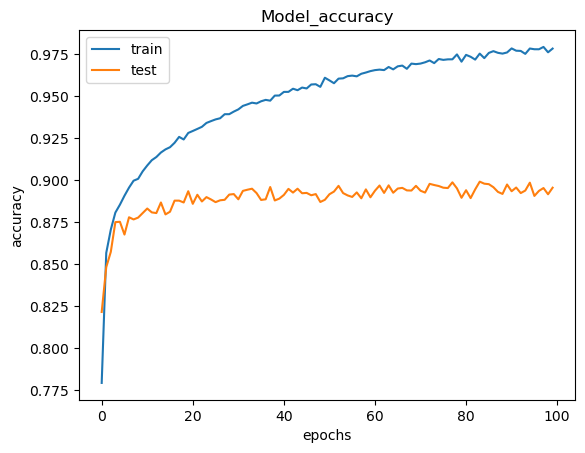

In [162]:
# 과적합 확인 => train과 test의 그래프 간격이 벌어지면 과적합
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

과적합 해소 방법

In [171]:
## 1. Dropout

## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
model.add(tf.keras.layers.Dense(154, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 학습 시킨 내용의 30% 정도를 날림
model.add(tf.keras.layers.Dense(68, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) # 학습 시킨 내용의 50% 정도를 날림 
model.add(tf.keras.layers.Dense(45, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 학습 시킨 내용의 30% 정도를 날림
model.add(tf.keras.layers.Dense(26, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) # 학습 시킨 내용의 50% 정도를 날림

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [172]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [173]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4196 - loss: 1.5290 - val_accuracy: 0.7334 - val_loss: 0.6847
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6770 - loss: 0.8362 - val_accuracy: 0.7569 - val_loss: 0.5814
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7224 - loss: 0.7330 - val_accuracy: 0.7804 - val_loss: 0.5626
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7350 - loss: 0.6987 - val_accuracy: 0.7884 - val_loss: 0.5495
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7532 - loss: 0.6632 - val_accuracy: 0.8027 - val_loss: 0.5132
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7628 - loss: 0.6456 - val_accuracy: 0.8091 - val_loss: 0.5044
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7697 - loss: 0.6297 - val_accuracy: 0.8081 - val_loss: 0.5136
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7779 - loss: 0.6112 - 

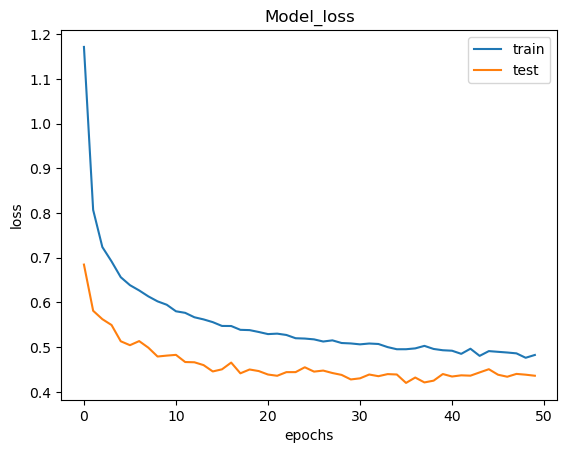

In [174]:
# 과적합 확인 => train과 test의 그래프 간격이 벌어지면 과적합
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [175]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 154)                 │         120,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 154)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 68)                  │          10,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 68)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 45)                  │           3,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 26)                  │           1,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │             270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,005 (1.56 MB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 272,004 (1.04 MB)

In [178]:
## 2. Regularize
## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
# kernel_regularizer=regularizers.l2 => l1 규제는 가중치의 절댓값, l2 규제는 가중치의 제곱을 사용
model.add(tf.keras.layers.Dense(154, activation='relu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(68, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(45, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(26, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [179]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [180]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7463 - loss: 0.9694 - val_accuracy: 0.8145 - val_loss: 0.6777
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8408 - loss: 0.6055 - val_accuracy: 0.8458 - val_loss: 0.5729
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8511 - loss: 0.5476 - val_accuracy: 0.8331 - val_loss: 0.5679
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8575 - loss: 0.5152 - val_accuracy: 0.8459 - val_loss: 0.5412
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8643 - loss: 0.4914 - val_accuracy: 0.8535 - val_loss: 0.5159
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8634 - loss: 0.4847 - val_accuracy: 0.8589 - val_loss: 0.4999
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8688 - loss: 0.4667 - val_accuracy: 0.8562 - val_loss: 0.5001
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8698 - loss: 0.4595 - 

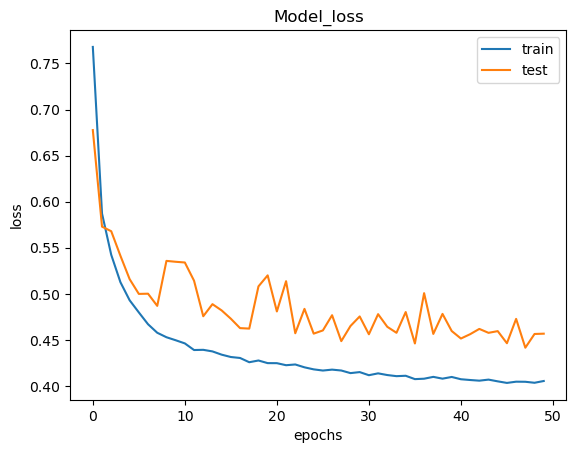

In [181]:
# 과적합 확인 => train과 test의 그래프 간격이 벌어지면 과적합
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [187]:
## 모델 파일로 저장
model.save('h5-model.h5') # 확장자는 무조건 .h5고 모델명은 마음대로
# 

In [190]:
# 모델 불러오기
load_model = tf.keras.models.load_model('h5-model.h5')

In [191]:
load_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 154)                 │         120,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 68)                  │          10,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 45)                  │           3,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 26)                  │           1,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,003 (531.27 KB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [192]:
load_model.evaluate(X_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:03 204ms/step - accuracy: 0.0625 - loss: 2.7261

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.0981 - loss: 2.7229


[2.722273588180542, 0.10300000011920929]

In [184]:
# 모델 체크 포인트 설정
## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
# kernel_regularizer=regularizers.l2 => l1 규제는 가중치의 절댓값, l2 규제는 가중치의 제곱을 사용
model.add(tf.keras.layers.Dense(154, activation='relu', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(68, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(45, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(26, activation='relu',
                                kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [195]:
## 모델 체크포인트 설정
cpt = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_cpt.weights.h5', # 체크포인트 저장 위치
                                        save_weights_only=True, # 가중치만 저장
                                        save_best_only=True, # 가장 좋은 모델만 저장
                                        monitor='val_loss',
                                        verbose=1)

In [196]:
model.fit(X_train, y_train, epochs=100,
         validation_data=(X_test, y_test),
         callbacks=[cpt])

Epoch 1/100
1846/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7547 - loss: 0.9624
Epoch 1: val_loss improved from inf to 0.66246, saving model to tmp_cpt.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7556 - loss: 0.9591 - val_accuracy: 0.8201 - val_loss: 0.6625
Epoch 2/100
1848/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8445 - loss: 0.5957
Epoch 2: val_loss improved from 0.66246 to 0.57351, saving model to tmp_cpt.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8445 - loss: 0.5955 - val_accuracy: 0.8452 - val_loss: 0.5735
Epoch 3/100
1844/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.5485
Epoch 3: val_loss did not improve from 0.57351
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8505 - loss: 0.5484 - val_accuracy: 0.8362 - val_loss: 0.5823
Epoch 4/100
1840/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.5175
Epoch 4: val_loss improved from 0.57351 to 0.51758, saving model to tm

In [199]:
model.fit(X_train, y_train, epochs=100,
         validation_split=0.3,
         callbacks=[cpt])

Epoch 1/100
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.3787
Epoch 1: val_loss improved from 0.43099 to 0.39498, saving model to tmp_cpt.weights.h5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.3787 - val_accuracy: 0.8834 - val_loss: 0.3950
Epoch 2/100
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8905 - loss: 0.3786
Epoch 2: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8905 - loss: 0.3786 - val_accuracy: 0.8782 - val_loss: 0.4013
Epoch 3/100
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8906 - loss: 0.3767
Epoch 3: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8906 - loss: 0.3767 - val_accuracy: 0.8727 - val_loss: 0.4128
Epoch 4/100
1295/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.3763
Epoch 4: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.89

In [201]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=5)

In [203]:
model.fit(X_train, y_train, 
          validation_split=0.3,
          epochs=100,
          callbacks=[earlyStopping, cpt])
# earlyStopping은 좋은 모델이 나오면 알아서 조기 종료한다.
# cpt는 checkpoint

Epoch 1/100
1287/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8949 - loss: 0.3630
Epoch 1: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8949 - loss: 0.3632 - val_accuracy: 0.8752 - val_loss: 0.4283
Epoch 2/100
1286/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.3726
Epoch 2: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8929 - loss: 0.3727 - val_accuracy: 0.8737 - val_loss: 0.4176
Epoch 3/100
1291/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8880 - loss: 0.3758
Epoch 3: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.3758 - val_accuracy: 0.8788 - val_loss: 0.4222
Epoch 4/100
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8934 - loss: 0.3675
Epoch 4: val_loss did not improve from 0.39498
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8933 - loss: 0.3676 - val_accuracy: 0.8653

In [205]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 154)                 │         120,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 68)                  │          10,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 45)                  │           3,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 26)                  │           1,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,005 (1.56 MB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 272,004 (1.04 MB)

연습

모델 체크 포인트 설정

In [48]:
# 모델 체크 포인트 설정
## 딥러닝 모델 만들기
model = tf.keras.Sequential()

# 입력층 만들기
model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])))

# 은닉층 만들기
# kernel_regularizer=regularizers.l2 => l1 규제는 가중치의 절댓값, l2 규제는 가중치의 제곱을 사용
model.add(tf.keras.layers.Dense(154, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 학습 시킨 내용의 30% 정도를 날림
model.add(tf.keras.layers.Dense(68, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) # 학습 시킨 내용의 50% 정도를 날림 
model.add(tf.keras.layers.Dense(45, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)) # 학습 시킨 내용의 30% 정도를 날림
model.add(tf.keras.layers.Dense(26, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5)) # 학습 시킨 내용의 50% 정도를 날림

# 출력층 만들기
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
## 모델 체크포인트 설정
cpt = tf.keras.callbacks.ModelCheckpoint(filepath='tmp_cpt.weights.h5', # 체크포인트 저장 위치
                                        save_weights_only=True, # 가중치만 저장
                                        save_best_only=True, # 가장 좋은 모델만 저장
                                        monitor='val_loss',
                                        verbose=1)

In [50]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 mode='min',
                                                 start_from_epoch=20,
                                                 min_delta=0.05,
                                                 verbose=1,
                                                 patience=5)

In [51]:
history = model.fit(X_train, y_train, 
          epochs=100,
          verbose=1,
          callbacks=[earlyStopping, cpt],
          validation_data=(X_test, y_test))

Epoch 1/100
1847/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3984 - loss: 1.5719
Epoch 1: val_loss improved from inf to 0.66533, saving model to tmp_cpt.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4007 - loss: 1.5662 - val_accuracy: 0.7675 - val_loss: 0.6653
Epoch 2/100
1849/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6992 - loss: 0.8279
Epoch 2: val_loss improved from 0.66533 to 0.54247, saving model to tmp_cpt.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6994 - loss: 0.8274 - val_accuracy: 0.7982 - val_loss: 0.5425
Epoch 3/100
1852/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7462 - loss: 0.7196
Epoch 3: val_loss improved from 0.54247 to 0.52765, saving model to tmp_cpt.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7463 - loss: 0.7195 - val_accuracy: 0.8083 - val_loss: 0.5276
Epoch 4/100
1845/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7629 - loss: 0.6803
Epoch 4: val_loss improved fro

In [52]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 154)                 │         120,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 154)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 68)                  │          10,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 68)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 45)                  │           3,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 26)                  │           1,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408,005 (1.56 MB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 272,004 (1.04 MB)

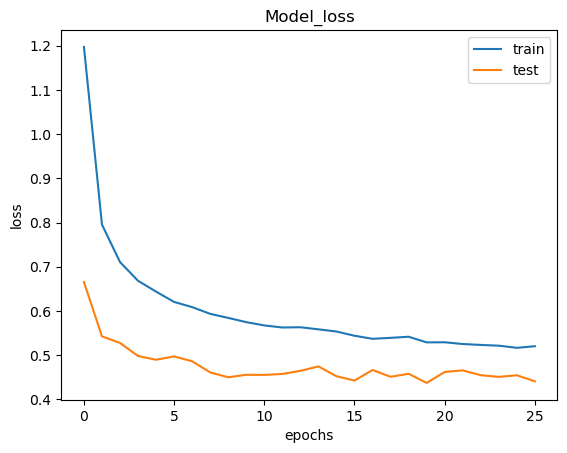

In [53]:
# 과적합 확인 => train과 test의 그래프 간격이 벌어지면 과적합
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [54]:
# 모델 성능 테스트
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8541 - loss: 0.4321


[0.4409370422363281, 0.8496999740600586]

In [55]:
# 모델 저장
model.save('h5_model.h5')

In [56]:
# 저장한 모델 불러오기
load_model = tf.keras.models.load_model('h5-model.h5')

In [57]:
load_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 154)                 │         120,890 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 154)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 68)                  │          10,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 68)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 45)                  │           3,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 45)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 26)                  │           1,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 26)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 10)                  │             270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,003 (531.27 KB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
# 모델 성능 테스트
load_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7530 - loss: 1.0300


[1.0292569398880005, 0.754800021648407]

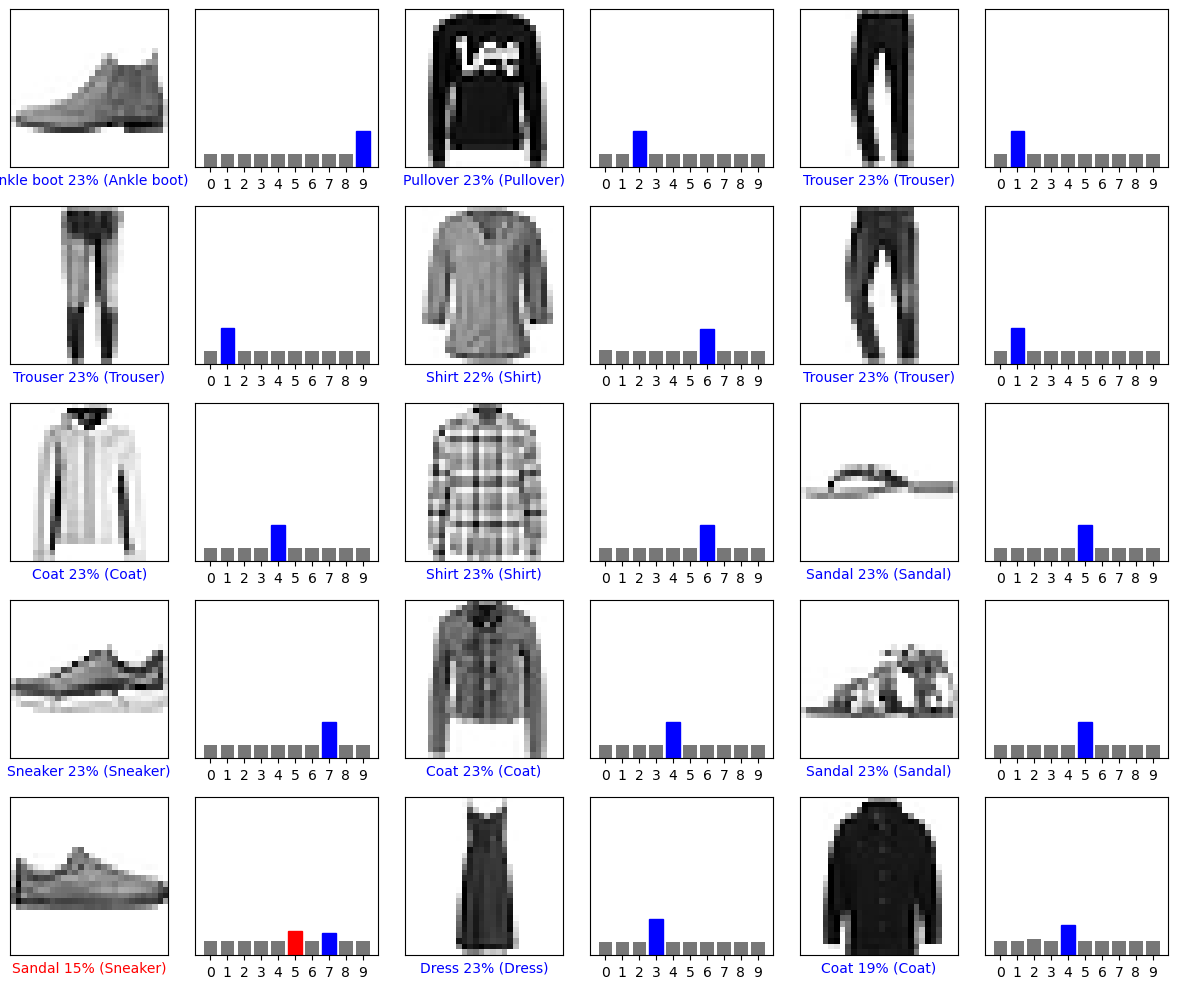

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()